ValueError: num must be an integer with 1 <= num <= 4, not 5

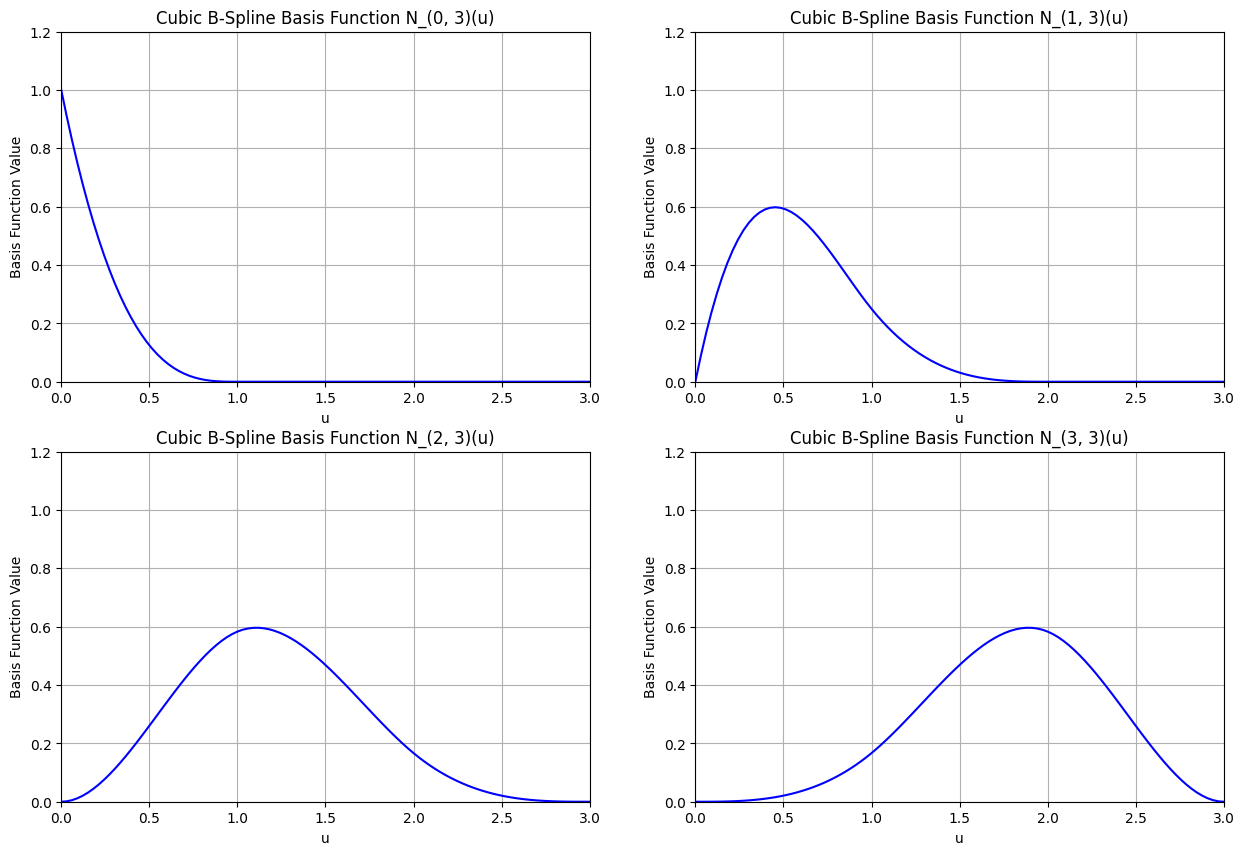

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# Define the knot vector and degree
k = 3  # Degree of the B-spline
knots = [0, 0, 0, 0, 1, 2, 3, 3, 3, 3]  # Knot vector
n = len(knots) - k - 1  # Number of basis functions

# Create a range of u values for plotting
u = np.linspace(0, 3, 100)

# Create a figure for subplots
plt.figure(figsize=(15, 10))

# Plot each B-spline basis function in a separate subplot
for i in range(n):
    # Create the B-spline basis function
    coeffs = [0] * n
    coeffs[i] = 1  # Set the coefficient for the i-th basis function
    spline = BSpline(knots, coeffs, k)

    # Evaluate the B-spline basis function at the u values
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid of subplots
    plt.plot(u, spline(u), label=f'N_{i,3}(u)', color='blue')
    plt.title(f'Cubic B-Spline Basis Function N_{i,3}(u)')
    plt.xlabel('u')
    plt.ylabel('Basis Function Value')
    plt.grid()
    plt.xlim(0, 3)
    plt.ylim(0, 1.2)
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')

# Adjust layout
plt.tight_layout()
plt.show()



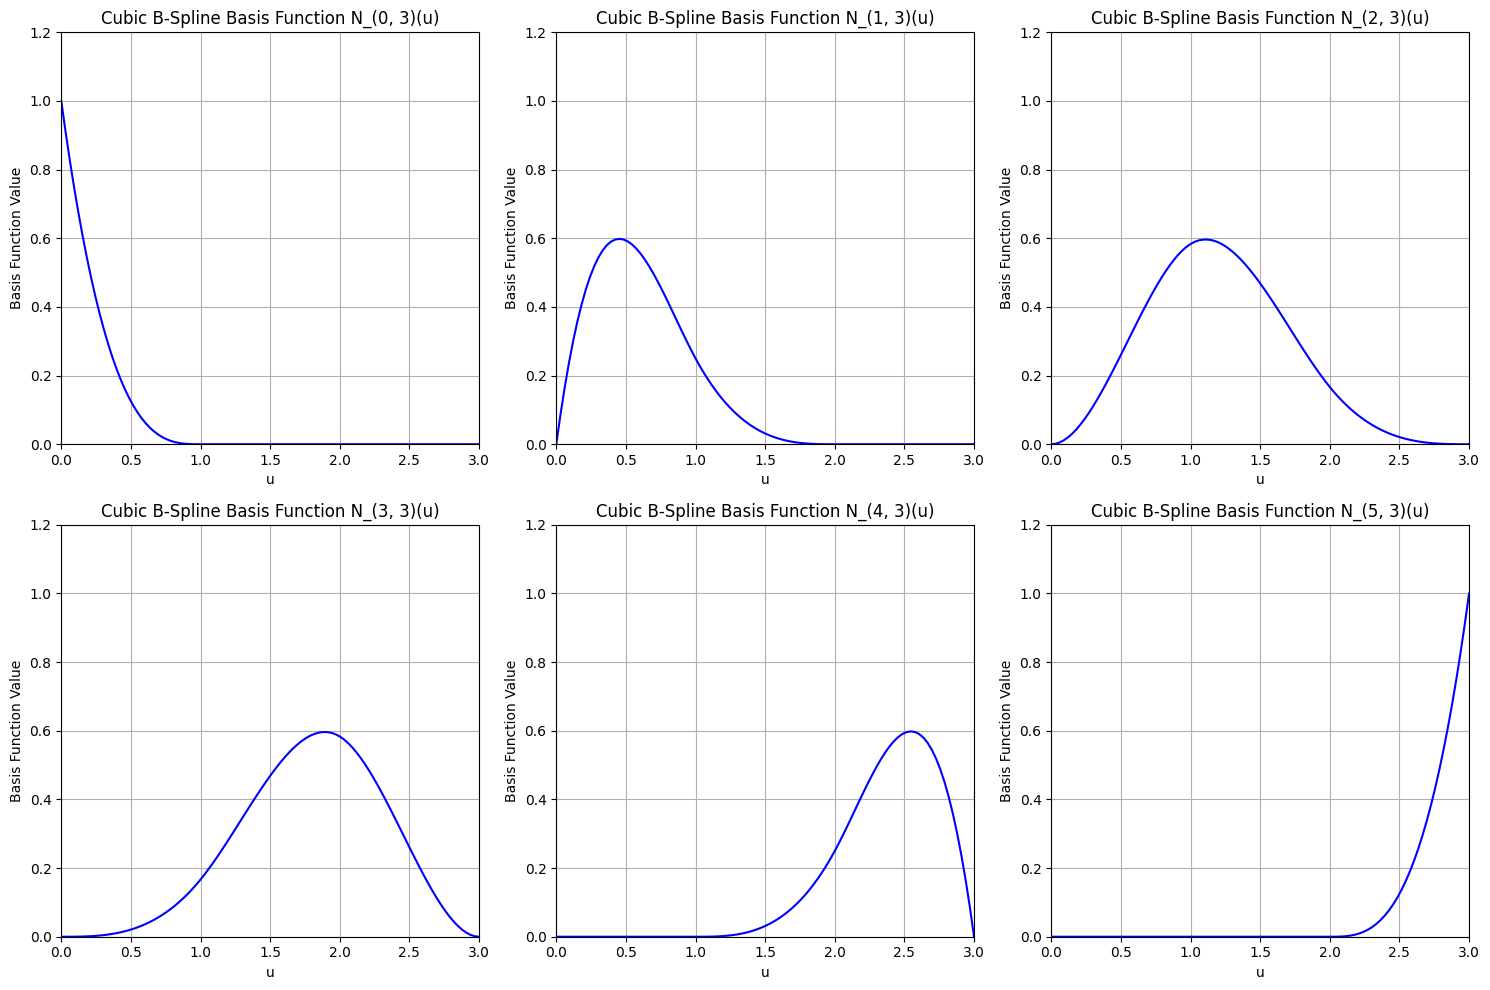

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# Define the knot vector and degree
k = 3  # Degree of the B-spline
knots = [0, 0, 0, 0, 1, 2, 3, 3, 3, 3]  # Knot vector
n = len(knots) - k - 1  # Number of basis functions

# Create a range of u values for plotting
u = np.linspace(0, 3, 100)

# Create a figure for subplots
plt.figure(figsize=(15, 10))

# Plot each B-spline basis function in a separate subplot
for i in range(n):
    # Create the B-spline basis function
    coeffs = [0] * n
    coeffs[i] = 1  # Set the coefficient for the i-th basis function
    spline = BSpline(knots, coeffs, k)

    # Evaluate the B-spline basis function at the u values
    plt.subplot(2, 3, i + 1)  # Create a 2x2 grid of subplots
    plt.plot(u, spline(u), label=f'N_{i,3}(u)', color='blue')
    plt.title(f'Cubic B-Spline Basis Function N_{i,3}(u)')
    plt.xlabel('u')
    plt.ylabel('Basis Function Value')
    plt.grid()
    plt.xlim(0, 3)
    plt.ylim(0, 1.2)
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')

# Adjust layout
plt.tight_layout()
plt.show()

The B-spline basis functions can be defined recursively. For cubic B-splines (degree ( k = 3 )), the basis functions can be derived from the following definitions:

Base Case (k = 0): The zeroth degree B-spline basis functions are defined as: 
$$[ N_{i,0}(u) = \begin{cases} 1 & \text{if } u_i \leq u < u_{i+1} \ 0 & \text{otherwise} \end{cases} ]$$

Recursive Definition: For $( k \geq 1 )$, the B-spline basis functions are defined recursively as: 
$$[ N_{i,k}(u) = \frac{u - u_i}{u_{i+k} - u_i} N_{i,k-1}(u) + \frac{u_{i+k+1} - u}{u_{i+k+1} - u_{i+1}} N_{i+1,k-1}(u) ]$$
where $( N_{i,k}(u) )$ is the ( i )-th B-spline basis function of degree ( k ).

For the Given Knot Vector

For the knot vector you provided: 
$[ \text{knot vector} = [0, 0, 0, 0, 1, 2, 3, 3, 3, 3] ]$
we can derive the cubic B-spline basis functions $( N_{i,3}(u) )$ for ($ i = 0, 1, 2, 3 )$.
Individual Basis Functions

( N_{0,3}(u) ): $[ N_{0,3}(u) = \begin{cases} 1 & \text{if } 0 \leq u < 1 \ \frac{3 - u}{2} & \text{if } 1 \leq u < 2 \ 0 & \text{otherwise} \end{cases} ]$

( N_{1,3}(u) ): $[ N_{1,3}(u) = \begin{cases} 0 & \text{if } 0 \leq u < 1 \ \frac{u - 0}{1 - 0} \cdot \frac{3 - u}{1} & \text{if } 1 \leq u < 2 \ \frac{3 - u}{1} & \text{if } 2 \leq u < 3 \ 0 & \text{otherwise} \end{cases} ]$

( N_{2,3}(u) ): $[ N_{2,3}(u) = \begin{cases} 0 & \text{if } 0 \leq u < 2 \ \frac{u - 1}{1} \cdot \frac{3 - u}{1} & \text{if } 2 \leq u < 3 \ 0 & \text{otherwise} \end{cases} ]$

( N_{3,3}(u) ): $[ N_{3,3}(u) = \begin{cases} 0 & \text{if } 0 \leq u < 3 \ 1 & \text{if } 3 \leq u < 3 \ 0 & \text{otherwise} \end{cases} ]$

Summary

The cubic B-spline basis functions are piecewise polynomial functions defined over the intervals determined by the knot vector. Each function is non-negative and has local support, meaning that each basis function is non-zero only over a limited range of ( u ). The exact expressions can be derived using the recursive definition, but the above piecewise definitions give a clear view of how each function behaves over the specified intervals.

Source for Cox-de Boor  Algrithm: https://pages.mtu.edu/~shene/COURSES/cs3621/NOTES/spline/B-spline/bspline-basis.html

Transformations of random variables: 
- Theroy: https://www.youtube.com/watch?v=d7OVgGGkve4
- Example 1: https://www.youtube.com/watch?v=rnP9fZqOxV0
- Example 2: https://www.youtube.com/watch?v=YN64L0lB7cc


(100, 6)


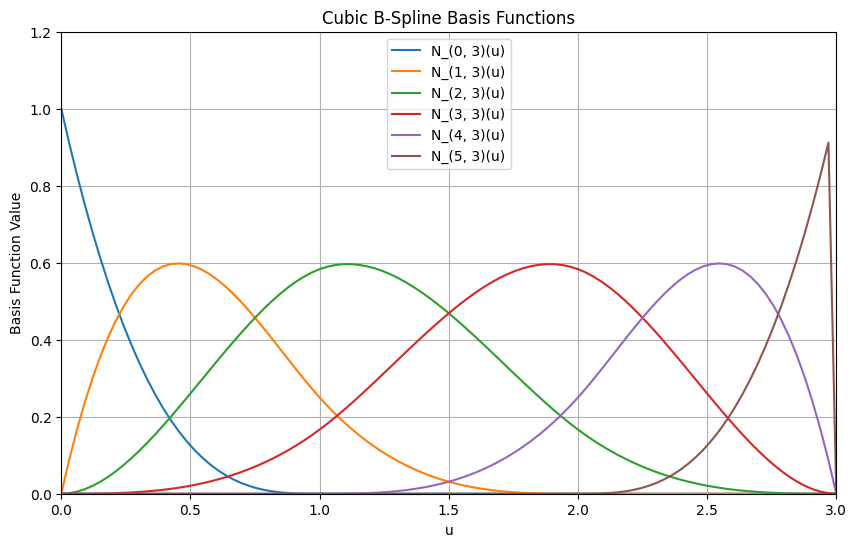

In [ ]:
import numpy as np

def cox_de_boor(u, i, k, knots):
    """
    Evaluate the B-spline basis function N_{i,k}(u) using the Cox-de Boor recursion.
    
    Parameters:
    u : float
        The parameter at which to evaluate the basis function.
    i : int
        The index of the basis function.
    k : int
        The degree of the B-spline.
    knots : list
        The knot vector.
    
    Returns:
    float
        The value of the B-spline basis function N_{i,k}(u).
    """
    # Base case for degree 0
    if k == 0:
        return 1.0 if knots[i] <= u < knots[i + 1] else 0.0
    
    # Check if the knot vector is valid
    if knots[i + k] == knots[i]:
        coeff1 = 0.0
    else:
        coeff1 = (u - knots[i]) / (knots[i + k] - knots[i]) * cox_de_boor(u, i, k - 1, knots)
    
    if knots[i + k + 1] == knots[i + 1]:
        coeff2 = 0.0
    else:
        coeff2 = (knots[i + k + 1] - u) / (knots[i + k + 1] - knots[i + 1]) * cox_de_boor(u, i + 1, k - 1, knots)
    
    return coeff1 + coeff2

# Example usage
if __name__ == "__main__":
    # Define the knot vector and degree
    knots = [0, 0, 0, 0, 1, 2, 3, 3, 3, 3]  # Knot vector k=3
    k = 3  # Degree of the B-spline

    # Evaluate the basis functions at a range of u values
    u_values = np.linspace(0, knots[-1], 100)
    basis_functions = np.zeros((len(u_values), len(knots) - k - 1))

    print(basis_functions.shape)

    for i in range(len(knots) - k - 1):
        for j, u in enumerate(u_values):
            basis_functions[j, i] = cox_de_boor(u, i, k, knots)

    # Plotting the basis functions
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    for i in range(len(knots) - k - 1):
        plt.plot(u_values, basis_functions[:, i], label=f'N_{i,k}(u)')
    
    plt.title('Cubic B-Spline Basis Functions')
    plt.xlabel('u')
    plt.ylabel('Basis Function Value')
    plt.grid()
    plt.legend()
    plt.xlim(0, knots[-1])
    plt.ylim(0, 1.2)
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.show()

(100, 4)


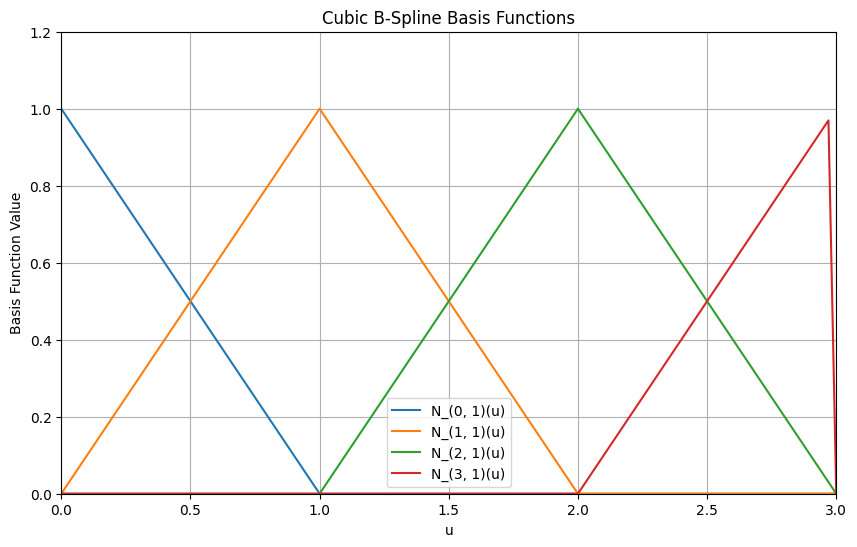

In [ ]:
import numpy as np

def cox_de_boor(u, i, k, knots):
    """
    Evaluate the B-spline basis function N_{i,k}(u) using the Cox-de Boor recursion.
    
    Parameters:
    u : float
        The parameter at which to evaluate the basis function.
    i : int
        The index of the basis function.
    k : int
        The degree of the B-spline.
    knots : list
        The knot vector.
    
    Returns:
    float
        The value of the B-spline basis function N_{i,k}(u).
    """
    # Base case for degree 0
    if k == 0:
        return 1.0 if knots[i] <= u < knots[i + 1] else 0.0
    
    # Check if the knot vector is valid
    if knots[i + k] == knots[i]:
        coeff1 = 0.0
    else:
        coeff1 = (u - knots[i]) / (knots[i + k] - knots[i]) * cox_de_boor(u, i, k - 1, knots)
    
    if knots[i + k + 1] == knots[i + 1]:
        coeff2 = 0.0
    else:
        coeff2 = (knots[i + k + 1] - u) / (knots[i + k + 1] - knots[i + 1]) * cox_de_boor(u, i + 1, k - 1, knots)
    
    return coeff1 + coeff2

# Example usage
if __name__ == "__main__":
    # Define the knot vector and degree
    #knots = [0, 0, 0, 0, 1, 2, 3, 3, 3, 3]  # Knot vector k=3
    #knots = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Knot vector
    #knots = [0, 0, 0, 0, 1, 2, 3]  # Knot vector
    knots = [0, 0, 1, 2, 3, 3]  # Knot vector k=1
    k = 1  # Degree of the B-spline

    # Evaluate the basis functions at a range of u values
    u_values = np.linspace(0, knots[-1], 100)
    basis_functions = np.zeros((len(u_values), len(knots) - k - 1))

    print(basis_functions.shape)

    for i in range(len(knots) - k - 1):
        for j, u in enumerate(u_values):
            basis_functions[j, i] = cox_de_boor(u, i, k, knots)

    # Plotting the basis functions
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    for i in range(len(knots) - k - 1):
        plt.plot(u_values, basis_functions[:, i], label=f'N_{i,k}(u)')
    
    plt.title('Cubic B-Spline Basis Functions')
    plt.xlabel('u')
    plt.ylabel('Basis Function Value')
    plt.grid()
    plt.legend()
    plt.xlim(0, knots[-1])
    plt.ylim(0, 1.2)
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.show()

# PROMPT 1:
“alternative to the cox-de boor algorithm”

# PROMPT 2: 
“How to calculate the variance of a basis function”

Calculating the variance of a basis function, such as a B-spline basis function, involves understanding the properties of the function and the distribution of the input values over which you want to compute the variance. Here’s a general approach to calculate the variance of a basis function:

# Steps to Calculate Variance of a Basis Function
1) Define the Basis Function: Let ( B_i(t) ) be the basis function of interest, where ( i ) indicates the index of the basis function and ( t ) is the parameter over which the function is defined.
2) Determine the Domain: Identify the interval ([a, b]) over which you want to compute the variance. This interval typically corresponds to the range of the parameter ( t ) for which the basis function is defined.
3) Calculate the Mean: The mean ( \mu ) of the basis function over the interval ([a, b]) is given by: $[ \mu = \frac{1}{b - a} \int_a^b B_i(t) , dt ]$
4) Calculate the Variance: The variance ( \sigma^2 ) of the basis function is calculated using the formula: $[ \sigma^2 = \frac{1}{b - a} \int_a^b (B_i(t) - \mu)^2 , dt ]$ This can be expanded to: $[ \sigma^2 = \frac{1}{b - a} \int_a^b B_i(t)^2 , dt - \mu^2 ]$

# Example Calculation
Let’s say you want to calculate the variance of a simple B-spline basis function ( B_i(t) ) over the interval ([0, 1]).
1) Define the Basis Function: Assume ( B_i(t) ) is defined for ( t \in [0, 1] ).
2) Calculate the Mean: $[ \mu = \int_0^1 B_i(t) , dt ]$ (You would compute this integral based on the specific form of ( B_i(t) )).
3) Calculate the Variance: $[ \sigma^2 = \int_0^1 B_i(t)^2 , dt - \mu^2 ]$

# Numerical Integration
In practice, especially for complex basis functions, you may need to use numerical integration techniques (like the trapezoidal rule or Simpson's rule) to evaluate the integrals if they cannot be solved analytically.

# Conclusion
The variance of a basis function provides insight into how much the function values vary over a specified interval. This can be useful in applications such as curve fitting, statistical modeling, and understanding the behavior of spline functions in various contexts.

# PROMPT 3: 
“t is a random variable. Do a transformation of random variables for ( B_i(t) ) to get the resulting y”

To transform a random variable ( B_i(t) ) into a resulting variable ( Y ), you typically apply a function ( Y = g(B_i(t)) ). The transformation process involves determining the distribution of ( Y ) based on the distribution of ( B_i(t) ) and the nature of the function ( g ). Understanding the properties of the transformation is crucial for accurate results. ### Steps for Transforming Random Variables

1) Define the Transformation:
Let $( Y = g(B_i(t)) )$, where ( g ) is a function that defines how the random variable $( B_i(t) )$ is transformed into ( Y ).
2) Identify the Distribution of $( B_i(t) )$:
3) Determine the probability distribution of the random variable ( B_i(t) ). This could be a known distribution (e.g., normal, uniform) or derived from the context of the problem.
4) Apply the Transformation:
Use the transformation function ( g ) to express ( Y ) in terms of ( B_i(t) ). For example, if ( g(x) = ax + b ) (a linear transformation), then: $[ Y = aB_i(t) + b ]$
Find the Distribution of ( Y ):
- If ( g ) is a monotonic function, you can use the cumulative distribution function (CDF) method: $[ F_Y(y) = P(Y \leq y) = P(g(B_i(t)) \leq y) ]$
- If ( g ) is not monotonic, you may need to consider the inverse function and account for the intervals where the function is increasing or decreasing.
5) Calculate the Expected Value and Variance of ( Y ):
- The expected value of ( Y ) can be calculated using: $[ E(Y) = E(g(B_i(t))) ]$
- The variance of ( Y ) can be derived from the transformation: $[ var(Y) = var(g(B_i(t))) ]$

# Example Transformation
Assume ( B_i(t) ) follows a normal distribution ( N(\mu, \sigma^2) ) and you want to transform it using ( g(x) = x^2 ).

1) Define the Transformation:
$[ Y = B_i(t)^2 ]$
2) Identify the Distribution:
$( B_i(t) \sim N(\mu, \sigma^2) )$.
3) Apply the Transformation:
The transformation ( Y = B_i(t)^2 ) leads to a new distribution.
4) Find the Distribution of ( Y ):
The distribution of ( Y ) can be derived using the properties of the chi-squared distribution if ( B_i(t) ) is standard normal.
5) Calculate Expected Value and Variance:
- The expected value: $[ E(Y) = E(B_i(t)^2) = var(B_i(t)) + [E(B_i(t))]^2 = \sigma^2 + \mu^2 ]$
- The variance can be calculated using the law of total variance or other methods depending on the complexity of ( g ).

# Conclusion
Transforming random variables involves careful consideration of the function applied and the distribution of the original variable. The resulting variable ( Y ) can provide insights into the behavior of the transformed data, which is essential in various statistical applications.




# PROMPT 4:
"t is the random variable and Bi is the transform function, which is also the basis function the basis function of a spline, where i is the basis function index"

Thank you for the clarification! If ( t ) is a random variable and ( B_i(t) ) is a B-spline basis function indexed by ( i ), we can discuss how to transform the random variable ( t ) through the basis function ( B_i(t) ) to obtain a new random variable ( Y ).
Transformation of a Random Variable through a Basis Function
Define the Random Variable:
Let ( t ) be a random variable with a known probability distribution (e.g., uniform, normal, etc.).
Define the Basis Function:
Let ( B_i(t) ) be the B-spline basis function corresponding to the index ( i ). The function ( B_i(t) ) is defined over a specific interval, typically determined by the knot vector of the spline.
Transform the Random Variable:
We can define a new random variable ( Y ) as: [ Y = B_i(t) ] Here, ( Y ) is the value of the B-spline basis function evaluated at the random variable ( t ).
Finding the Distribution of ( Y )
To find the distribution of ( Y ), we need to consider the distribution of ( t ) and how it affects the output of the basis function ( B_i(t) ).
Determine the Range of ( t ):
Identify the support of the random variable ( t ) and the corresponding range of ( B_i(t) ). The B-spline basis function is typically defined over a specific interval, and its values will depend on the knots and the degree of the spline.
Calculate the CDF of ( Y ):
The cumulative distribution function (CDF) of ( Y ) can be expressed as: [ F_Y(y) = P(Y \leq y) = P(B_i(t) \leq y) ] To compute this, you need to find the values of ( t ) for which ( B_i(t) \leq y ) holds true. This may involve solving the equation ( B_i(t) = y ) for ( t ).
Use the Change of Variables Technique:
If ( B_i(t) ) is invertible (or piecewise invertible), you can use the change of variables technique to find the probability density function (PDF) of ( Y ): [ f_Y(y) = f_t(t) \left| \frac{dt}{dy} \right| ] where ( f_t(t) ) is the PDF of the random variable ( t ) and ( \frac{dt}{dy} ) is the derivative of the inverse function of ( B_i(t) ) with respect to ( y ).
Example
Suppose ( t ) is uniformly distributed over the interval ([0, 1]), and you want to evaluate the B-spline basis function ( B_i(t) ).
Define the Random Variable:
( t \sim U(0, 1) ).
Define the Basis Function:
Let’s say ( B_i(t) ) is a quadratic B-spline basis function defined over the interval ([0, 1]).
Transform the Random Variable:
Define ( Y = B_i(t) ).
Find the CDF of ( Y ):
To find ( F_Y(y) ), you would need to determine the values of ( t ) such that ( B_i(t) \leq y ). This may involve solving for ( t ) in terms of ( y ).
Calculate the PDF of ( Y ):
If you can find the inverse of ( B_i(t) ) and its derivative, you can compute the PDF ( f_Y(y) ).
Conclusion
The transformation of a random variable ( t ) through a B-spline basis function ( B_i(t) ) results in a new random variable ( Y ). The distribution of ( Y ) can be derived from the distribution of ( t ) and the properties of the basis function. If you have a specific B-spline basis function or distribution for ( t ) in mind, please provide that information for a more detailed analysis!
Bookmark message
Copy message


